In [36]:
import numpy as np
# import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
def plot(img, title, color = True):
    # plt.figure(figsize=(10,10))
    plt.style.use("seaborn-v0_8-white")
    plt.figure(figsize=(8,5))
    plt.title(title)
    if color:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap="gray")
    plt.show()

In [38]:
def probability_roll(target):
    if target < 1 or target > 20:
        return 0.0  # Impossible roll

    successful_outcomes = 21 - target
    total_outcomes = 20
    probability = successful_outcomes / total_outcomes
    return probability

def probability_roll_modifier(target, modifier):
    if target < 1 or target > 20:
        return 0.0  # Impossible roll

    successful_outcomes = 21 - target
    total_outcomes = 20
    probability = np.clip((successful_outcomes + modifier) / total_outcomes, 0.0, 1.0)
    return probability

def probability_roll_with_advantage(target):
    if target < 1 or target > 20:
        return 0.0  # Impossible roll

    prob_fail_single_die = (target - 1) / 20.0
    prob_fail_both_dice = prob_fail_single_die ** 2
    prob_success = 1 - prob_fail_both_dice
    return prob_success

def probability_roll_with_disadvantage(target):
    if target < 1 or target > 20:
        return 0.0  # Impossible roll

    prob_success_single_die = (21 - target) / 20.0
    prob_success_both_dice = prob_success_single_die ** 2
    return prob_success_both_dice

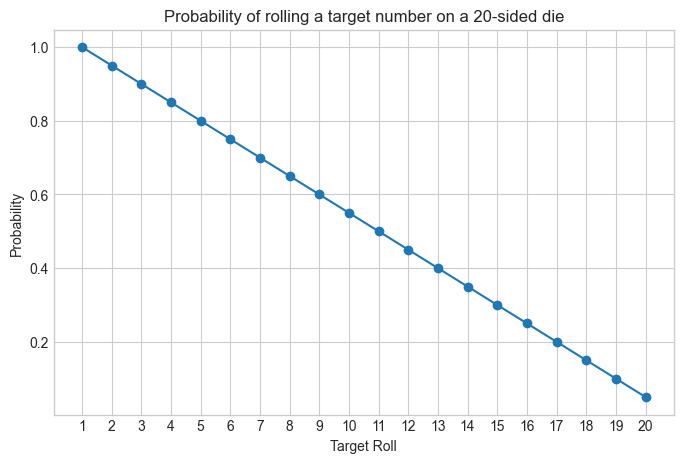

In [48]:
x = np.arange(1, 21, 1)
y = [probability_roll(i) for i in x]

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(8,5))

plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel("Target Roll")
plt.ylabel("Probability")
plt.title("Probability of rolling a target number on a 20-sided die")
plt.xticks(np.arange(1, 21, 1))
# plt.grid()
plt.show()


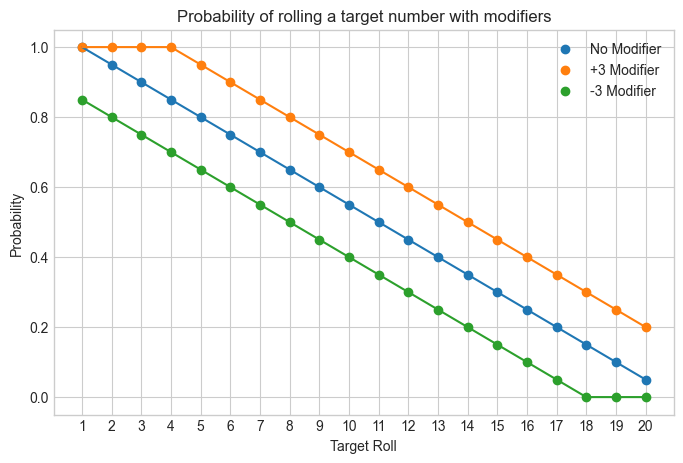

In [45]:
x = np.arange(1, 21, 1)
y = [probability_roll(i) for i in x]
y_plus3 = [probability_roll_modifier(i, 3) for i in x]
y_minus3 = [probability_roll_modifier(i, -3) for i in x]

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(8,5))

plt.plot(x, y)
plt.scatter(x, y, marker="o", label="No Modifier")

plt.plot(x, y_plus3)
plt.scatter(x, y_plus3, marker="o", label="+3 Modifier")

plt.plot(x, y_minus3)
plt.scatter(x, y_minus3, marker="o", label="-3 Modifier")

plt.xlabel("Target Roll")
plt.ylabel("Probability")
plt.title("Probability of rolling a target number with modifiers")
plt.xticks(np.arange(1, 21, 1))
# plt.grid()
plt.legend()
plt.show()

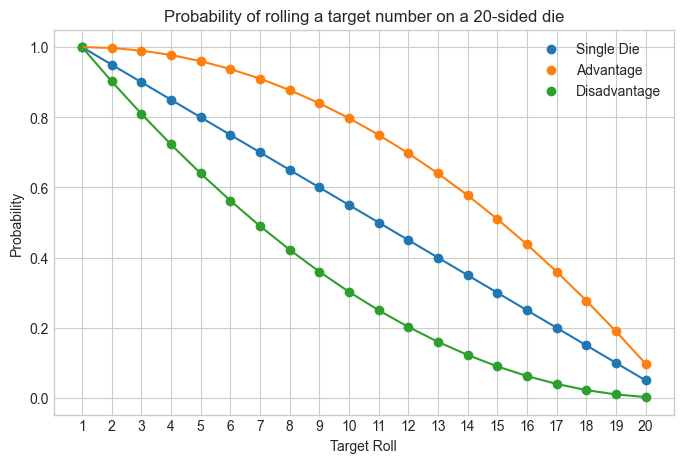

In [47]:
x = np.arange(1, 21, 1)
y = [probability_roll(i) for i in x]
y_adv = [probability_roll_with_advantage(i) for i in x]
y_dis = [probability_roll_with_disadvantage(i) for i in x]

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(8,5))

plt.plot(x, y)
plt.scatter(x, y, marker="o", label="Single Die")

plt.plot(x, y_adv)
plt.scatter(x, y_adv, marker="o", label="Advantage")

plt.plot(x, y_dis)
plt.scatter(x, y_dis, marker="o", label="Disadvantage")

plt.xlabel("Target Roll")
plt.ylabel("Probability")
plt.title("Probability of rolling a target number on a 20-sided die")
plt.xticks(np.arange(1, 21, 1))
# plt.grid()
plt.legend()
plt.show()